In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'], index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [62]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
# DataFrame.quantile(q=0.5, axis=0, numeric_only=_NoDefault.no_default, interpolation='linear', method='single')[source]
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

Text(0, 0.5, 'Pages Views')

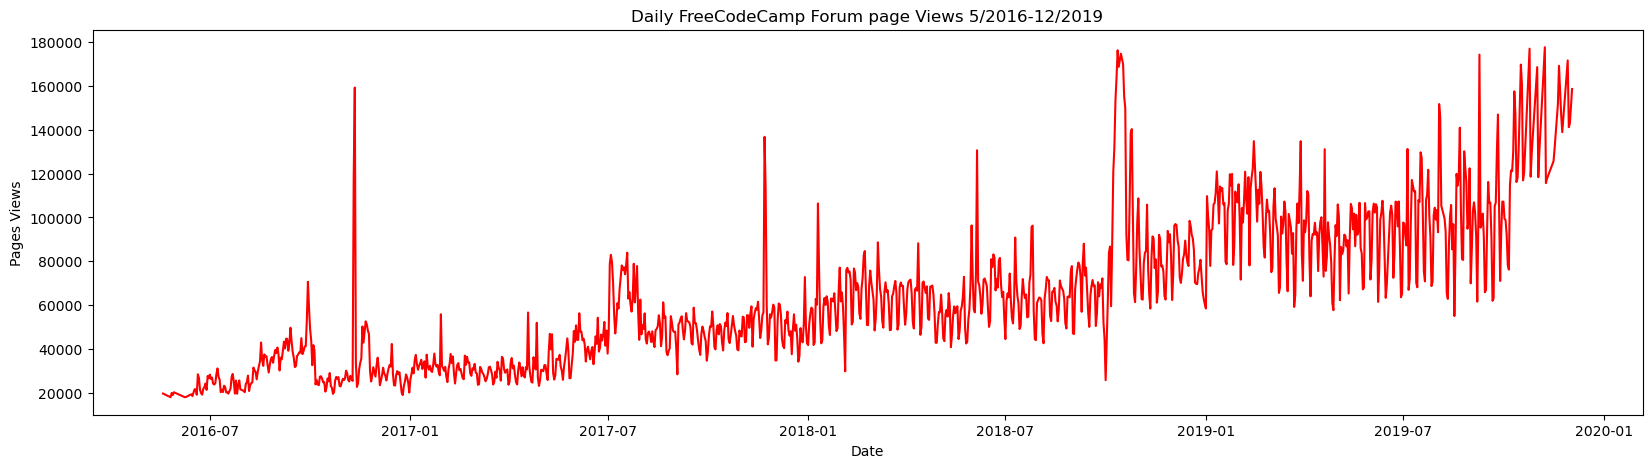

In [63]:

fig, ax = plt.subplots(figsize=(20,5))

ax.plot(df.index, df['value'], 'r')
ax.set_title('Daily FreeCodeCamp Forum page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Pages Views')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


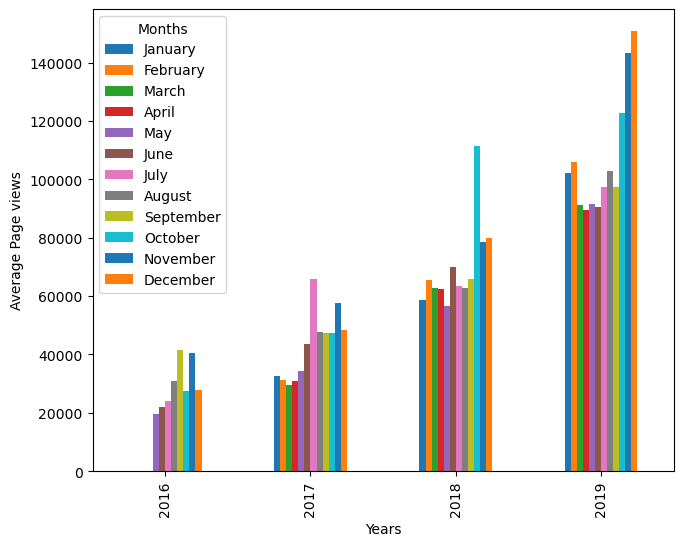

In [148]:
# Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". 
# It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. 
# On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

# Copy and modify data for monthly bar plot
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df.index = pd.to_datetime(df.index, utc=True)
df['month'] = df.index.month
df['year'] = df.index.year



df_bar = df.groupby(['year','month'])['value'].mean()
df_bar = df_bar.unstack()
# df_bar.columns = months

fig = df_bar.plot.bar(figsize=(7.5,6)).figure
plt.ylabel('Average Page views')
plt.xlabel('Years')
plt.legend(months, title='Months')

df_bar

,date,value,month,year,sort_month
210,2017-01-06 00:00:00+00:00,37353,Jan,2017,1
937,2019-01-06 00:00:00+00:00,94108,Jan,2019,1
936,2019-01-05 00:00:00+00:00,77897,Jan,2019,1
935,2019-01-04 00:00:00+00:00,94514,Jan,2019,1
934,2019-01-03 00:00:00+00:00,100710,Jan,2019,1
...,...,...,...,...,...
567,2017-12-29 00:00:00+00:00,72819,Dec,2017,12
566,2017-12-28 00:00:00+00:00,51018,Dec,2017,12
565,2017-12-27 00:00:00+00:00,43075,Dec,2017,12
201,2016-12-28 00:00:00+00:00,28424,Dec,2016,12


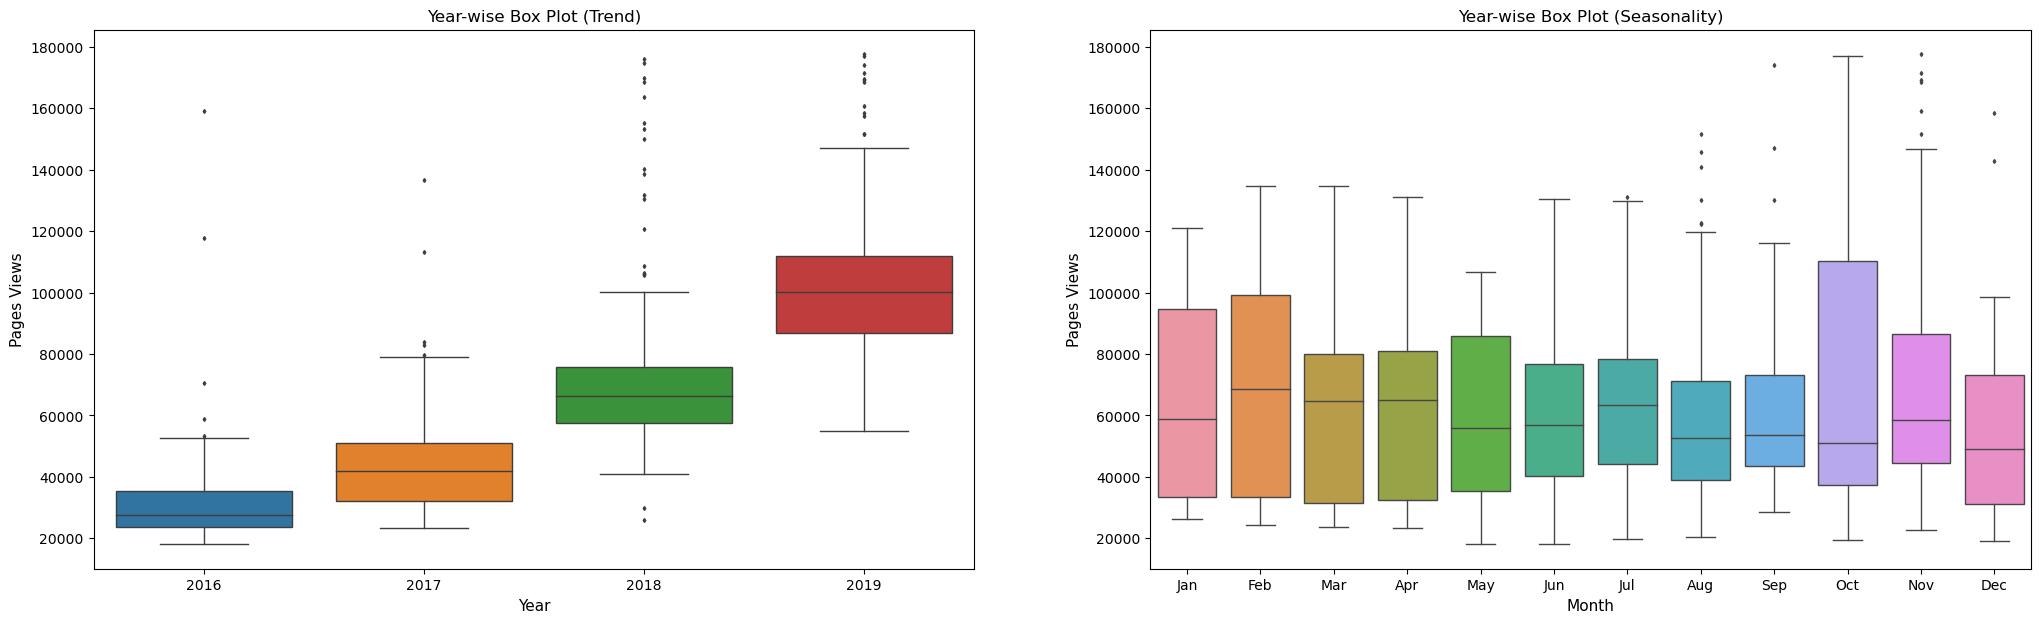

In [150]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box['sort_month'] = df_box['date'].dt.month
df_box = df_box.sort_values('sort_month')

fig, ax = plt.subplots(1,2,figsize=(25,7))

ax[0] = sns.boxplot(data=df_box, x="year", y="value", ax= ax[0], fliersize=2, linewidth=1)
ax[1] = sns.boxplot(data=df_box, x="month", y="value", fliersize=2, linewidth=1)

ax[0].set_title('Year-wise Box Plot (Trend)', fontsize=12)
ax[0].set_xlabel('Year', fontsize=11)
ax[0].set_ylabel('Pages Views', fontsize=11)

ax[1].set_title('Year-wise Box Plot (Seasonality)', fontsize=12)
ax[1].set_xlabel('Month', fontsize=11)
ax[1].set_ylabel('Pages Views', fontsize=11)

df_box